In [71]:
# import python libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# import csv file
df=pd.read_csv('insurance_data.csv',index_col='index')
df

In [119]:
df.shape

(1340, 10)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


In [75]:
#check for null values
pd.isnull(df).sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [76]:
# drop null values
df.dropna(inplace=True)

In [77]:
# change data type
df['age'] = df['age'].astype('int')

In [78]:
df['age'].dtypes

dtype('int64')

In [79]:
df.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [80]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#  Form groups

# Gender

In [18]:
df['gender'].value_counts()

gender
male      670
female    662
Name: count, dtype: int64

<Axes: ylabel='count'>

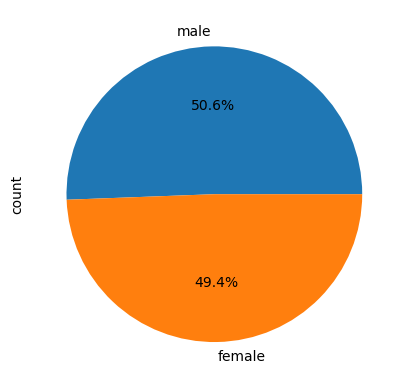

In [145]:
#ploting a piechart on gender and its count
df['gender'].value_counts().plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='gender'>

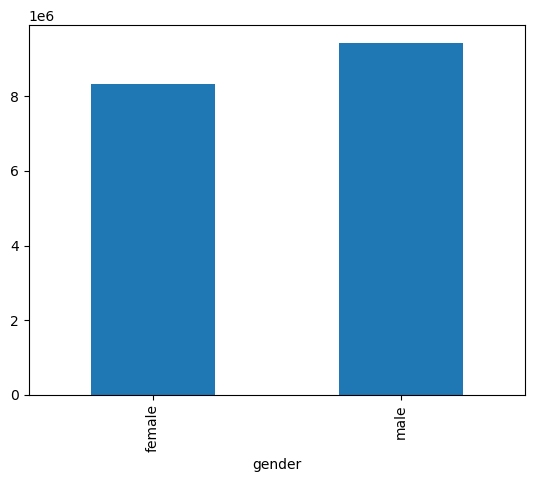

In [120]:
# Gender vs claim
df.groupby('gender')['claim'].sum().plot(kind='bar')

From above graph,we can see that male claim comparatively higher than female 

# Age

In [82]:
df['age'].describe()

count    1332.000000
mean       38.086336
std        11.112804
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

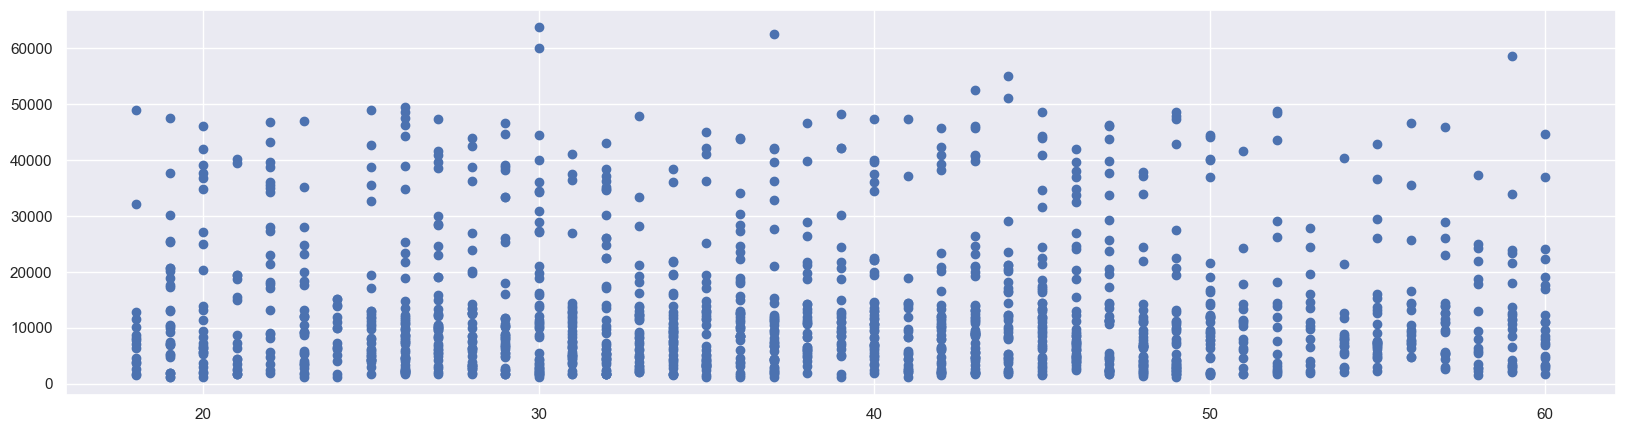

In [156]:
# plotting a scatter for age vs claim
plt.scatter(df['age'],df['claim'])

In [135]:
#feature engineering on age col.
def transform (value) :
  if value >= 18 and value <= 30 :
     return 'young'
  elif value >= 31 and value <= 50  :
     return 'middle'   
  else :
     return 'older'
df['new_age']=df['age'].apply(transform)    

In [84]:
df['new_age'].value_counts()

new_age
middle    744
young     396
older     192
Name: count, dtype: int64

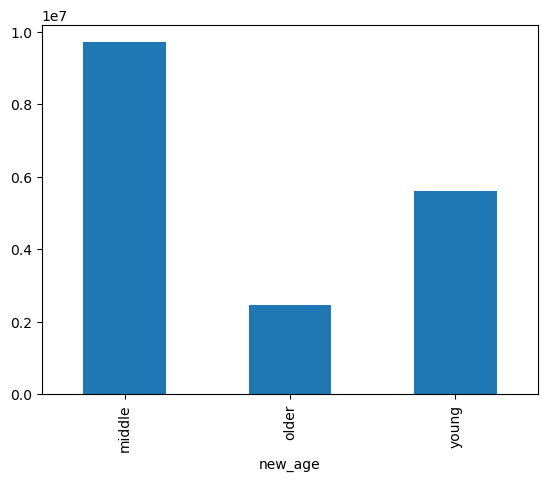

In [95]:
##new_age vs claim
new=df.groupby('new_age')['claim'].sum().plot(kind='bar')


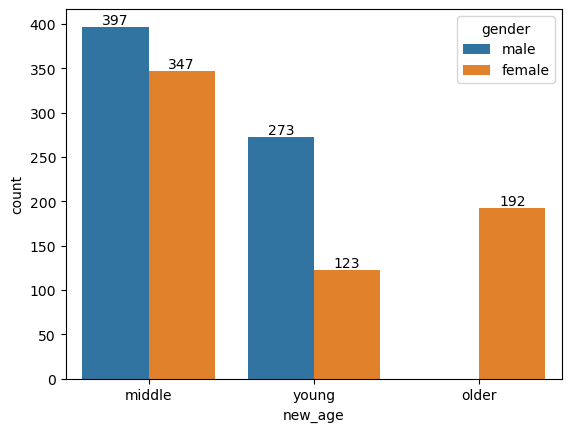

In [96]:
#ploting a countplot on new_age 
ax = sns.countplot(data = df, x = 'new_age', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

From the above graph, we can see that most of the individuals belong to the middle age group and within this group, males are slightly more than females.





# Region

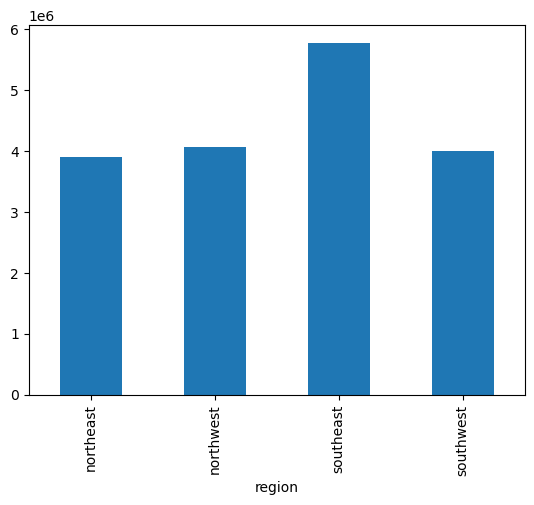

In [97]:
# plotting a bar chart for region vs claim
new=df.groupby('region')['claim'].sum().plot(kind='bar')

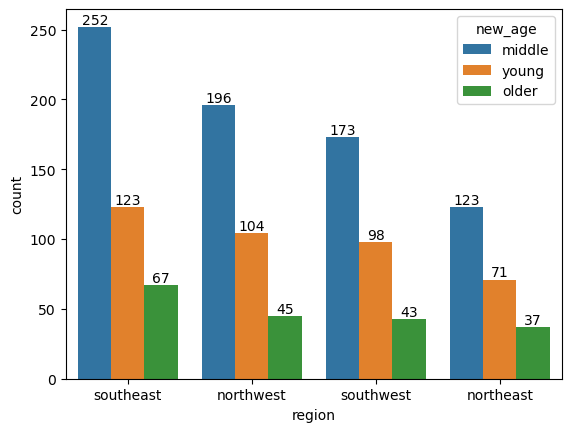

In [103]:
ax = sns.countplot(data = df, x = 'region', hue = 'new_age')
for bars in ax.containers:
    ax.bar_label(bars)

Above graph shows that the southeast region has the highest number of individuals overall, and across all regions, the middle-aged group is the most dominant.

# children

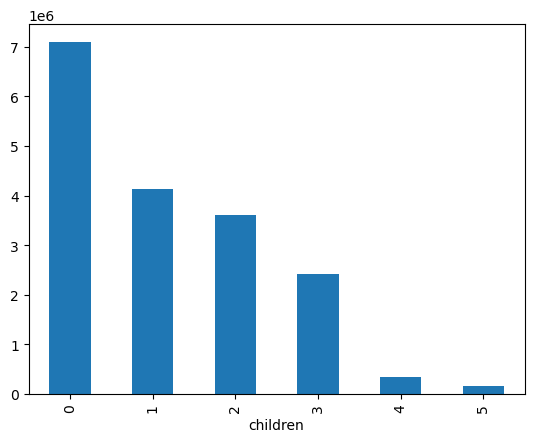

In [149]:
#children vs claim
new=df.groupby('children')['claim'].sum().plot(kind='bar')

In [110]:
pd.crosstab(df['children'],df['new_age'])

new_age,middle,older,young
children,,,
0,317,84,167
1,184,54,86
2,129,29,82
3,87,20,50
4,17,3,5
5,10,2,6


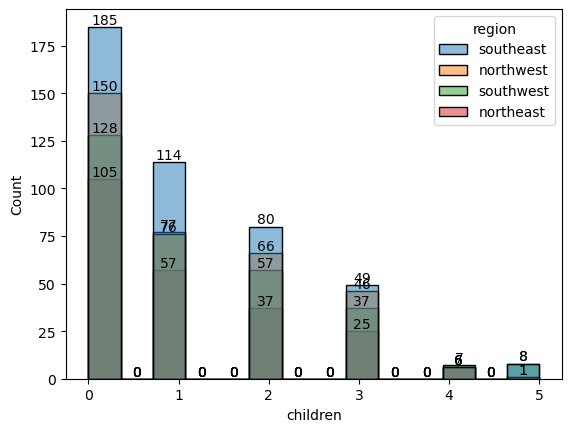

In [117]:
ax = sns.histplot(data = df, x = 'children', hue = 'region')

for bars in ax.containers:
    ax.bar_label(bars)

Based on the graph, it is observed that People with no or fewer children make more insurance claims, and the southeast region has the most people, which could be a reason for higher claims from there."

# Diabetic

<Axes: xlabel='diabetic'>

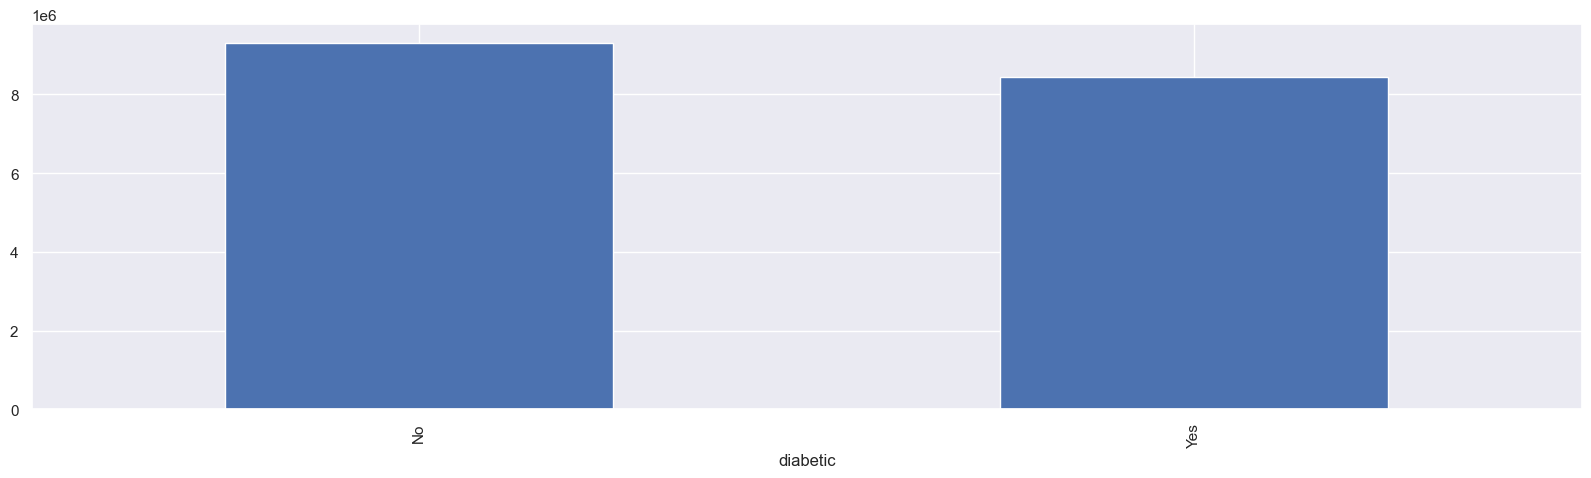

In [127]:
df.groupby('diabetic')['claim'].sum().plot(kind='bar')

In [107]:
pd.crosstab(df['diabetic'],df['gender'])

gender,female,male
diabetic,,
No,339,356
Yes,323,314


Based on the cross-tab, we observe that males and non-diabetic people are higher in numbers, these groups make higher claims.





# Smoker

<Axes: ylabel='claim'>

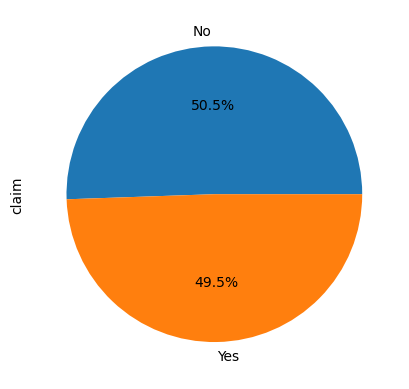

In [154]:
df.groupby('smoker')['claim'].sum().plot(kind='pie',autopct='%0.1f%%')

In [160]:
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
No,164,291,352,256
Yes,67,58,91,58


In [ ]:
From above graph we can see that non smoker slightly higher claim then smoker

# Bloodpressure

In [127]:
df['bloodpressure']

index
0        91
1        87
2        82
3        80
4       100
       ... 
1335     88
1336    120
1337     91
1338    106
1339    101
Name: bloodpressure, Length: 1340, dtype: int64

In [129]:
#feature engineering on bloodpressure col.
def transform (value) :
  if value >= 80 and value <= 100 :
     return 'low bloodpressure'
  elif value >= 101 and value <= 120  :
     return 'medium bloodpressure'   
  else :
     return 'high bloodpressure'

In [130]:
df['new_bloodpressure']=df['bloodpressure'].apply(transform)

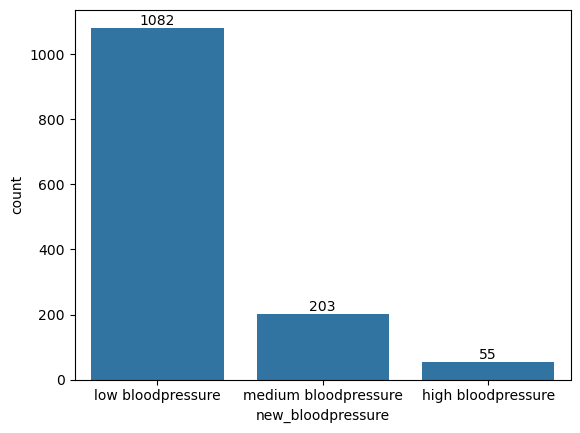

In [43]:
ax = sns.countplot(data = df, x = 'new_bloodpressure')

for bars in ax.containers:
    ax.bar_label(bars)

In [131]:
pd.crosstab(df['diabetic'],df['new_bloodpressure'])

new_bloodpressure,high bloodpressure,low bloodpressure,medium bloodpressure
diabetic,,,
No,27,569,102
Yes,28,513,101


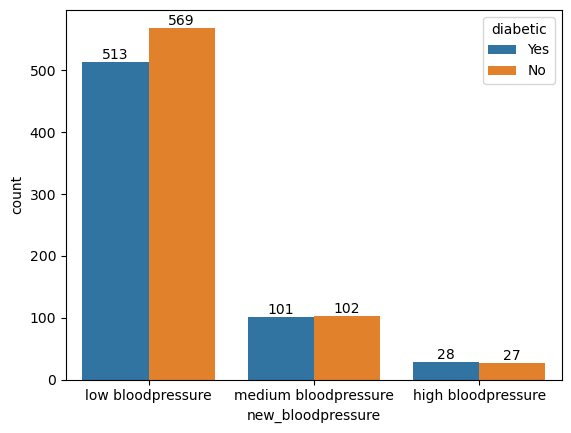

In [133]:
ax = sns.countplot(data = df, x = 'new_bloodpressure', hue = 'diabetic')

for bars in ax.containers:
    ax.bar_label(bars)

Most people are non-diabetic and have low blood pressure, and since both groups show higher claims, they likely contribute more to the total claim value.



## Conclusion ##

The analysis reveals that insurance claims are more likely to be higher among non-diabetic, middle-aged, non-smoking males with low blood pressure, especially from the southeast region, and particularly among those with no children.